# XOR

Training MLP to learn something like this. Sounds like a simple enough task. If we don't use a bias there are only 6 parameters to learn.

![](https://cdn-images-1.medium.com/max/1600/1*qA_APGgbbh0QfRNsRyMaJg.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ],
    dtype=np.float32
)
targets = np.array([0, 1, 1, 0])

(-0.1, 1.1)

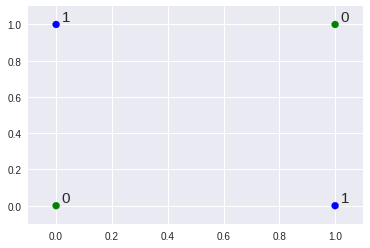

In [3]:
colors = {0: 'green', 1: 'blue'}
plt.scatter(data[:, 0], data[:, 1], c=[colors[t] for t in targets])
for datum, target in zip(data, targets):
    plt.text(datum[0]+0.02, datum[1]+0.02, target, fontsize=15)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))

## Keras

In [4]:
import tensorflow as tf

/home/alexis/anaconda3/envs/ift6135/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, name='hidden', use_bias=False))
model.add(tf.keras.layers.Dense(1, name='output', use_bias=False))

In [6]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 4         
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(data, targets, batch_size=4, epochs=1000, verbose=0)

In [9]:
model.predict(data)

array([[0.        ],
       [0.36859947],
       [0.2840477 ],
       [0.6526472 ]], dtype=float32)

In [10]:
model.get_layer('hidden').get_weights()

[array([[-0.46301538,  0.11510307],
        [-1.0361668 , -0.81547034]], dtype=float32)]